# Import main library


In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
df = pd.read_csv('funda-amsterdam.csv') #This loads an object with many fields, including a description
df = df.dropna() #Let's get rid of rows with empty cells, because they will trip up a lot of the analyses
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


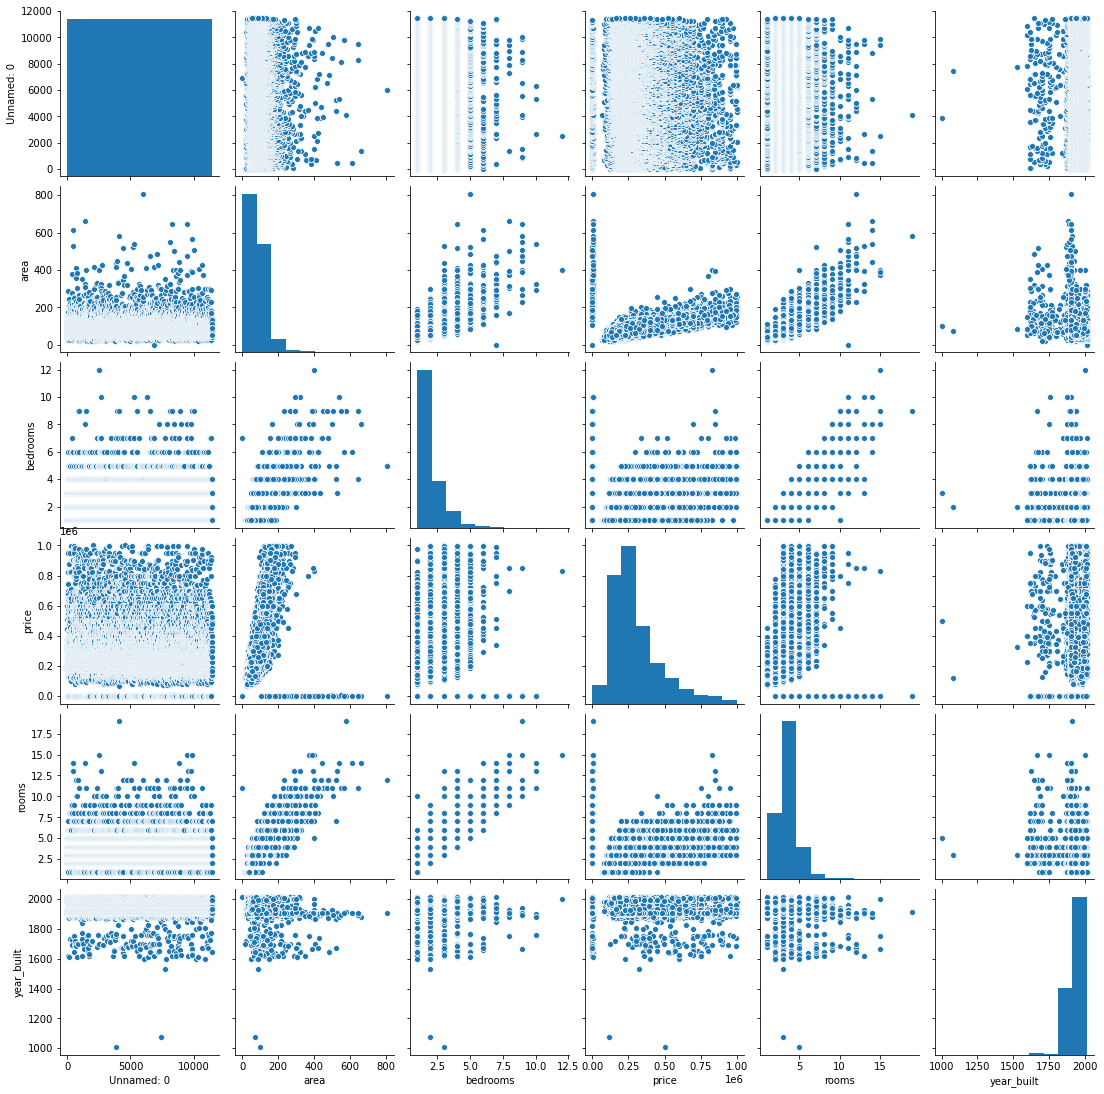

In [12]:
sns.pairplot(df)
plt.show()

In [15]:
df.corr()

,Unnamed: 0,area,bedrooms,price,rooms,year_built
Unnamed: 0,1.000000,-0.021892,-0.017067,-0.069133,-0.019047,0.002437
area,-0.021892,1.000000,0.746445,0.312488,0.817351,0.012825
bedrooms,-0.017067,0.746445,1.000000,0.287918,0.906076,0.080491
price,-0.069133,0.312488,0.287918,1.000000,0.283424,-0.087834
rooms,-0.019047,0.817351,0.906076,0.283424,1.000000,-0.017336
year_built,0.002437,0.012825,0.080491,-0.087834,-0.017336,1.000000


In [24]:
y = df['price'] #We need to take out the rating as our Y-variable
X = df.loc[:,('area','rooms', 'year_built')] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['address'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,area,rooms,year_built
address,,,
Knollendamstraat 4 III/IV,108,3,1906
Moerdijkstraat 47 1,47,2,1938
Zeeburgerdijk 349,116,3,2003
Brederodestraat 124 -1,58,3,1910
Admiraal De Ruijterweg 409 III,63,3,1906


In [25]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,area,rooms,year_built
address,,,
Wittenburgergracht 61,138,4,1906
Postjeskade 137 I,57,3,1931
Het Hoogt 38,104,2,1968
Kolfschotenstraat 170,71,3,1981
Lekstraat 184 1,88,4,1932


In [27]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [28]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
746.497462,area
12281.576591,rooms
-257.524532,year_built


In [29]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.12973560299689546

In [30]:
math.sqrt(mean_squared_error(y_test, y_test_p))

170558.06854245596

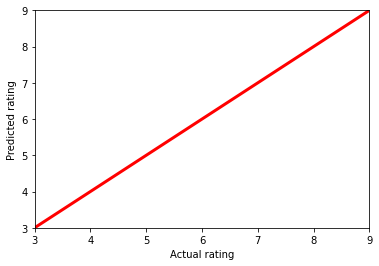

In [31]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()